# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [3]:
bbc.sample(5)

,category,text
1990,politics,tories opposing 24-hour drinking the tories sa...
1698,tech,chip maker backs net phone calls rich templeto...
370,tech,text messages aid disaster recovery text messa...
219,politics,mps assess scots fishing industry a group of m...
1068,sport,angry williams rejects criticism serena willia...


In [4]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [29]:
# Your code here
bbc["category"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

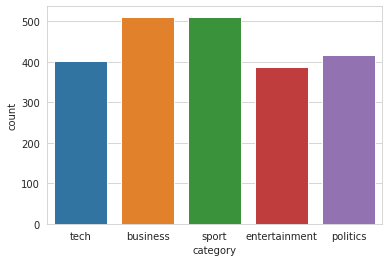

In [6]:
sns.countplot(bbc["category"])

In [7]:
from collections import Counter  

In [14]:
vocab  = Counter()

In [15]:
for text in bbc["text"]:
  for word in text.split(" "):
    vocab[word] += 1
vocab.most_common(20)

[('', 65553),
 ('the', 52567),
 ('to', 24955),
 ('of', 19947),
 ('and', 18561),
 ('a', 18251),
 ('in', 17570),
 ('s', 9007),
 ('for', 8884),
 ('is', 8515),
 ('that', 8135),
 ('it', 7584),
 ('on', 7460),
 ('was', 6016),
 ('he', 5933),
 ('be', 5765),
 ('with', 5313),
 ('said', 5072),
 ('as', 4976),
 ('has', 4952)]

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
vocab_reduced = Counter()

for word, count in vocab.items():
  if word not in stop_words:
      vocab_reduced[word] = count
vocab_reduced.most_common(20)

[('', 65553),
 ('said', 5072),
 ('-', 3195),
 ('mr', 2992),
 ('would', 2574),
 ('also', 2154),
 ('people', 1970),
 ('new', 1957),
 ('us', 1786),
 ('one', 1705),
 ('could', 1509),
 ('said.', 1499),
 ('year', 1396),
 ('last', 1380),
 ('first', 1277),
 ('.', 1171),
 ('two', 1161),
 ('government', 1085),
 ('world', 1076),
 ('uk', 993)]

In [19]:
def clean(s):
  s = re.sub(r"<[^>]*>", " ", s)
  s = re.sub(r"[ ]+", " ", s)
  s = re.sub(r"\b")
  return s.lower()


In [22]:
bbc["text"] = bbc["text"].apply(clean)

In [26]:
vocab_c = Counter()
for c in bbc["category"].unique():
  vocab_c = Counter()
  print(f"{c}: ")
  text_c = bbc.loc[bbc["category"] == c]["text"].values
  for text in text_c:
    for word in text.split(" "):
      if(word not in stop_words):
        vocab_c[word] += 1
  print(vocab_c.most_common(20))

tech: 
[('said', 1199), ('people', 928), ('also', 536), ('new', 516), ('-', 509), ('mr', 508), ('one', 480), ('would', 470), ('could', 469), ('mobile', 451), ('technology', 448), ('users', 379), ('digital', 362), ('games', 360), ('music', 357), ('many', 354), ('use', 347), ('us', 334), ('net', 324), ('like', 320)]
business: 
[('said', 1309), ('us', 781), ('-', 779), ('mr', 600), ('year', 465), ('would', 463), ('also', 439), ('new', 413), ('company', 393), ('last', 359), ('market', 358), ('said.', 342), ('growth', 341), ('firm', 339), ('government', 327), ('bank', 318), ('could', 311), ('economic', 310), ('economy', 297), ('sales', 290)]
sport: 
[('said', 529), ('-', 477), ('england', 435), ('first', 426), ('would', 394), ('game', 385), ('win', 368), ('last', 351), ('two', 349), ('world', 345), ('one', 339), ('also', 329), ('back', 305), ('time', 278), ('new', 275), ('players', 273), ('cup', 270), ('play', 265), ('side', 244), ('good', 244)]
entertainment: 
[('film', 687), ('-', 641), (

In [28]:
bbc["text"].values

array(['tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow people to record store play pause and forward wind tv programmes when they want. essentially the technology allows for much more personalised tv. they are also being built-in to high-definition

In [30]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split(" ")]

In [31]:
from sklearn.model_selection import train_test_split

X = bbc["text"]
y = bbc["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=stop_words,
                        tokenizer=tokenizer_porter,
                        preprocessor=clean)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=26))])
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function clean at 0x7efbe84fd730>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'ou...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7efbe84ac488>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def evaluateM(model, x, y):
  predictions = model.predict(x)
  print('accuracy:',accuracy_score(y,predictions))
  print('confusion matrix:\n',confusion_matrix(y_test,predictions))
  print('classification report:\n',classification_report(y_test,predictions))

In [47]:
evaluateM(clf, X_test, y_test)

accuracy: 0.9820224719101124
confusion matrix:
 [[89  0  1  0  0]
 [ 0 91  0  0  1]
 [ 3  0 81  1  0]
 [ 1  0  0 98  0]
 [ 0  0  1  0 78]]
classification report:
                precision    recall  f1-score   support

     business       0.96      0.99      0.97        90
entertainment       1.00      0.99      0.99        92
     politics       0.98      0.95      0.96        85
        sport       0.99      0.99      0.99        99
         tech       0.99      0.99      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf__2  = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(max_depth=2, random_state=24))])

In [45]:
clf__2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function clean at 0x7efbe84fd730>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'ou...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=2, max_features='auto',
                                        max_leaf_nodes=None, ma

In [49]:
evaluateM(clf__2, X_test, y_test)

accuracy: 0.9820224719101124
confusion matrix:
 [[89  0  1  0  0]
 [ 0 91  0  0  1]
 [ 3  0 81  1  0]
 [ 1  0  0 98  0]
 [ 0  0  1  0 78]]
classification report:
                precision    recall  f1-score   support

     business       0.96      0.99      0.97        90
entertainment       1.00      0.99      0.99        92
     politics       0.98      0.95      0.96        85
        sport       0.99      0.99      0.99        99
         tech       0.99      0.99      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [54]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X_train)

In [55]:

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [56]:
grid_search.fit(X_vec, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [57]:
best_grid = grid_search.best_estimator_

In [59]:
evaluateM(best_grid, X_test, y_test)

accuracy: 0.9820224719101124
confusion matrix:
 [[89  0  1  0  0]
 [ 0 91  0  0  1]
 [ 3  0 81  1  0]
 [ 1  0  0 98  0]
 [ 0  0  1  0 78]]
classification report:
                precision    recall  f1-score   support

     business       0.96      0.99      0.97        90
entertainment       1.00      0.99      0.99        92
     politics       0.98      0.95      0.96        85
        sport       0.99      0.99      0.99        99
         tech       0.99      0.99      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [62]:
pred = best_grid.predict(vectorizer.transform(X_test))
pred

array(['business', 'business', 'business', 'sport', 'sport', 'business',
       'business', 'business', 'business', 'business', 'business',
       'business', 'business', 'sport', 'sport', 'sport', 'business',
       'business', 'business', 'sport', 'sport', 'business', 'business',
       'business', 'business', 'business', 'business', 'sport',
       'business', 'business', 'business', 'business', 'sport', 'sport',
       'sport', 'business', 'sport', 'business', 'business', 'business',
       'sport', 'business', 'business', 'sport', 'business', 'business',
       'business', 'business', 'business', 'business', 'business',
       'business', 'business', 'business', 'sport', 'business',
       'business', 'business', 'business', 'business', 'sport',
       'business', 'business', 'sport', 'sport', 'sport', 'business',
       'business', 'sport', 'business', 'business', 'business',
       'business', 'business', 'business', 'sport', 'business',
       'business', 'sport', 'sport', 'bus

In [70]:
idx = np.where(pred == y_test)

In [77]:
bbc.iloc[idx[0]].values[0]

array(['entertainment',
       'ocean s twelve raids box office ocean s twelve the crime caper sequel starring george clooney brad pitt and julia roberts has gone straight to number one in the us box office chart. it took 0m (1m) in weekend ticket sales according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one national treasure into third place. wesley snipes blade: trinity was in second taking 6m (m). rounding out the top five was animated fable the polar express starring tom hanks and festive comedy christmas with the kranks. ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us after the three films in the lord of the rings trilogy. the sequel narrowly beat its001 predecessor ocean s eleven which took 8m (9m) on its opening weekend and 84m (5m) in total. a remake of the960s film starring frank sinatra and the rat pack ocean s eleven w

In [76]:
bbc.iloc[~idx[0]].values[0]

array(['business',
       'cars pull down us retail figures us retail sales fell% in january the biggest monthly decline since last august driven down by a heavy fall in car sales. the% fall in car sales had been expected coming after december s% rise in car sales fuelled by generous pre-christmas special offers. excluding the car sector us retail sales were up% in january twice what some analysts had been expecting. us retail spending is expected to rise in005 but not as quickly as in004. steve gallagher us chief economist at sg corporate & investment banking said january s figures were decent numbers . we are not seeing the numbers that we saw in the second half of004 but they are still pretty healthy he added. sales at appliance and electronic stores were down% in january while sales at hardware stores dropped by% and furniture store sales dipped%. sales at clothing and clothing accessory stores jumped% while sales at general merchandise stores a category that includes department st